In [1]:
#Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [3]:
#Load data
df = pd.read_csv('car_data_v2.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2119 entries, 0 to 2118
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   car_name       2119 non-null   object 
 1   brand          2119 non-null   object 
 2   model          2119 non-null   object 
 3   vehicle_age    2119 non-null   int64  
 4   km_driven      2119 non-null   int64  
 5   mileage        2119 non-null   float64
 6   max_power      2119 non-null   float64
 7   seats          2119 non-null   int64  
 8   selling_price  2119 non-null   int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 149.1+ KB


In [ ]:
import pandas as pd

# Load your dataset
df = pd.read_csv('car_data_v2.csv')  # Replace with your actual file path

# Now you can check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

#Increase of null values
#impute the null values with
#1. arbitary constant
#2. central tendancies(mean,median,mode)
#3. backward fill
#4. forward fill


Missing values per column:
car_name         0
brand            0
model            0
vehicle_age      0
km_driven        0
mileage          0
max_power        0
seats            0
selling_price    0
dtype: int64


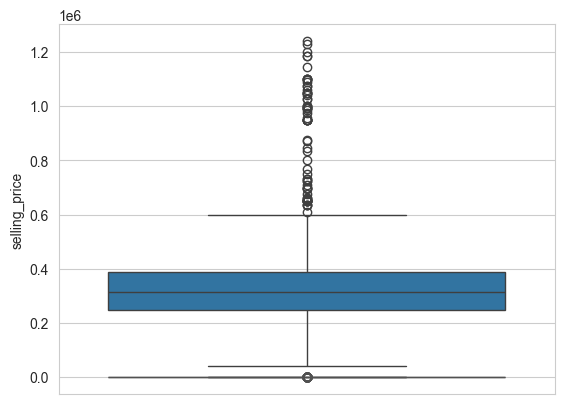

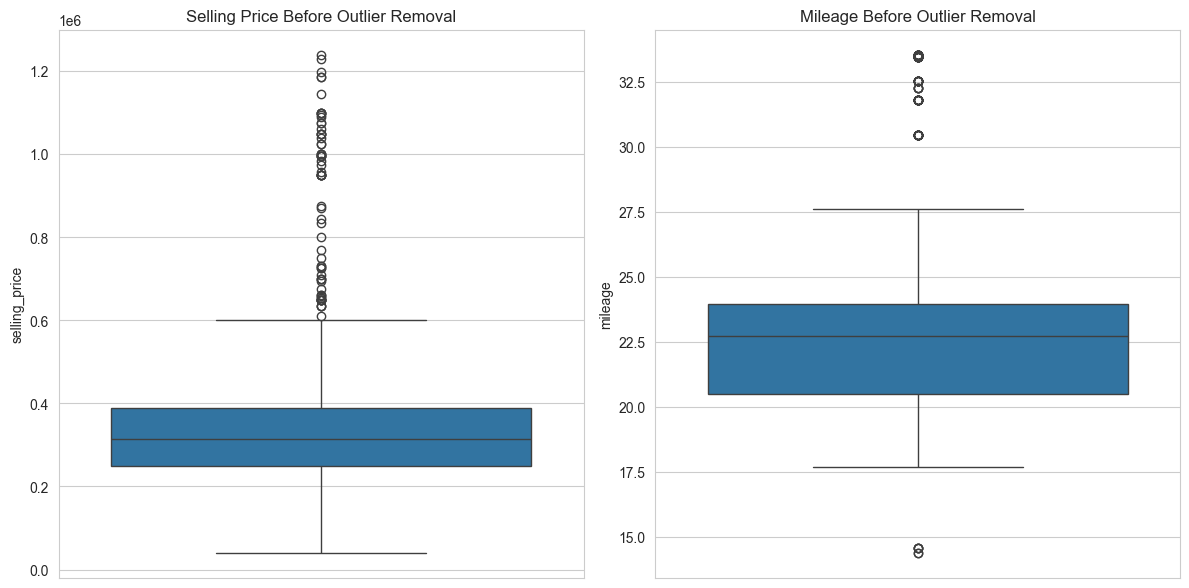

Number of outliers in selling_price: 70
Number of outliers in mileage: 94


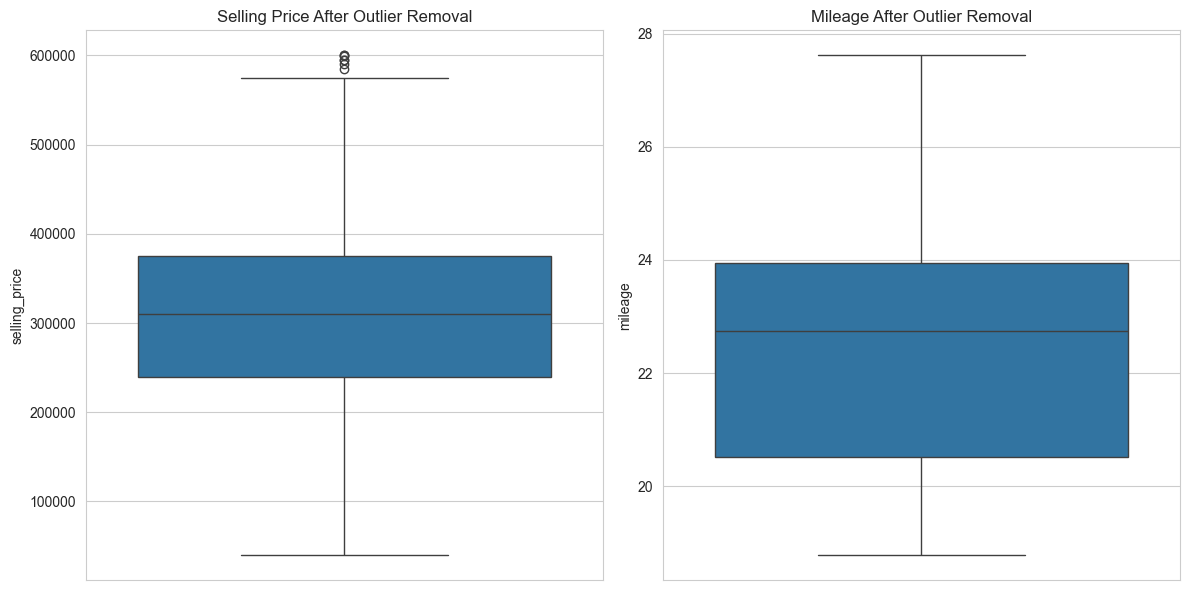

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
#How to detect  outliers
sns.boxplot(df['selling_price'])
#For mileage
sns.boxplot(df['mileage'])
# Function to detect and handle outliers using IQR
def handle_outliers(df, column):
    # Calculate IQR
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    
    # Define bounds
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    # Identify outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"Number of outliers in {column}: {len(outliers)}")
    
    # Remove outliers
    df_clean = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    return df_clean

# Visualize outliers before treatment
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=df['selling_price'])
plt.title('Selling Price Before Outlier Removal')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['mileage'])
plt.title('Mileage Before Outlier Removal')
plt.tight_layout()
plt.show()

# Handle outliers for selling_price and mileage

df = handle_outliers(df, 'selling_price')
df = handle_outliers(df, 'mileage')

# Visualize after outlier removal
#Selling_price Boxplot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=df['selling_price'])
plt.title('Selling Price After Outlier Removal')

#Mileage Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y=df['mileage'])
plt.title('Mileage After Outlier Removal')
plt.tight_layout()
plt.show()

DataFrame columns:
Index(['car_name', 'brand', 'model', 'vehicle_age', 'km_driven', 'mileage',
       'max_power', 'seats', 'selling_price'],
      dtype='object')

Data types:
car_name          object
brand             object
model             object
vehicle_age        int64
km_driven          int64
mileage          float64
max_power        float64
seats              int64
selling_price      int64
dtype: object


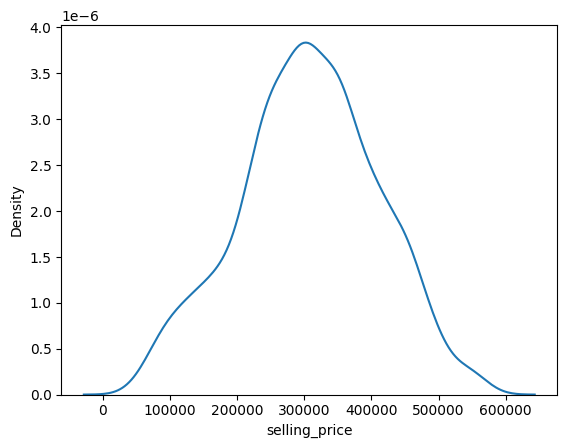

In [17]:
#Detecting skewness
#Graph of normal distribution - displot, kde plot
from operator import index


sns.kdeplot(df['selling_price'])
#Skewness =0 -> perfect normal distribution
#-1 <skewness<1 -> almost normal
#skewness <= -1 -> negatively skewed/left skewed
#skewness >= -1 -> positively skewed/right skewed
df_num = df.select_dtypes(include= ['int64','float64'])
df_num.skew()
#Handling skewness of data
#Data transformation -> log transformation, sqr transformation , function transformation
#log transformation
df_num['km_log'] = np.log(df_num['km_driven'])
df_num.skew()
#  to check columns
print("DataFrame columns:")
print(df.columns)

#  to check data types
print("\nData types:")
print(df.dtypes)

In [28]:
#Data encoding
#Step 1-> import
from sklearn.preprocessing import LabelEncoder
#Step 2 -> Initialize
le= LabelEncoder()
#Step 3-> Fit& Transform
df['brand_new']= le.fit_transform(df['brand'])
df[['brand','brand_new']]
from sklearn.preprocessing import OrdinalEncoder # the order matters
from sklearn.preprocessing import OneHotEncoder
#increase the number of columns after encoding
df_cat = df.select_dtypes(include= 'object')
df_cat.head()
#From OrdinalEncoder library
oe = OrdinalEncoder()
encode = oe.fit_transform(df_cat)
encode #out - is an array
df_oe = pd.DataFrame(encode, columns= df_cat.columns)
df_oe.head()
#From OneHotEncode Library
# Initialize OneHotEncoder (keeping default sparse=True)
ohe = OneHotEncoder()

# Fit and transform
encode1 = ohe.fit_transform(df_cat)
encode1 #Output is a sparse matrix
# Convert sparse matrix to dense array explicitly
df_ohe = pd.DataFrame(encode1.toarray(), columns=ohe.get_feature_names_out())

df_ohe.head()

ohe = OneHotEncoder(drop = 'first')
encode1 = ohe.fit_transform(df_cat)
encode1 #Output is a sparse matrix
# Convert sparse matrix to dense array explicitly
df_ohe = pd.DataFrame(encode1.toarray(), columns=ohe.get_feature_names_out())

df_ohe.head()

df.describe()

,vehicle_age,km_driven,mileage,max_power,seats,selling_price,brand_new
count,1948.000000,1948.000000,1948.000000,1948.000000,1948.000000,1948.000000,1948.000000
mean,6.332136,42595.183778,22.304728,60.330364,5.004107,306976.835216,2.074949
std,3.554702,28124.228345,2.133277,9.353286,0.090559,103316.294891,0.583570
min,0.000000,1000.000000,18.780000,38.400000,5.000000,40000.000000,0.000000
25%,4.000000,22000.000000,20.510000,53.260000,5.000000,240000.000000,2.000000
50%,5.000000,38155.500000,22.740000,67.000000,5.000000,305500.000000,2.000000
75%,8.000000,59113.750000,23.950000,67.050000,5.000000,375000.000000,2.000000
max,29.000000,425785.000000,27.620000,123.370000,7.000000,575000.000000,4.000000


In [37]:
#Feature Scalling
from sklearn.preprocessing import StandardScaler
#converts the data into normal distribution with mean 0 and varience 1
ss = StandardScaler()
scaled = ss.fit_transform(df_num)
scaled  #output -> is an array
df_scaled = pd.DataFrame(scaled,columns=df_num.columns)
df_scaled.head()
df_scaled.describe()

#Task -> implement min max scaller
from sklearn.preprocessing import MinMaxScaler
#Converts the data in the range of 0-1
mm = MinMaxScaler()
scale = mm.fit_transform(df_num)
scale #output -> is a array
df_scale = pd.DataFrame(scale,columns= df_num.columns)
df_scale.head()
df_scale.describe()


,vehicle_age,km_driven,mileage,max_power,seats,selling_price,km_log
count,1948.000000,1948.000000,1948.000000,1948.000000,1948.000000,1948.000000,1948.000000
mean,0.218350,0.097921,0.398725,0.258095,0.002053,0.499022,0.578944
std,0.122576,0.066208,0.241321,0.110078,0.045279,0.193115,0.129663
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.137931,0.049437,0.195701,0.174885,0.000000,0.373832,0.510584
50%,0.172414,0.087469,0.447964,0.336589,0.000000,0.496262,0.601536
75%,0.275862,0.136807,0.584842,0.337178,0.000000,0.626168,0.673852
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


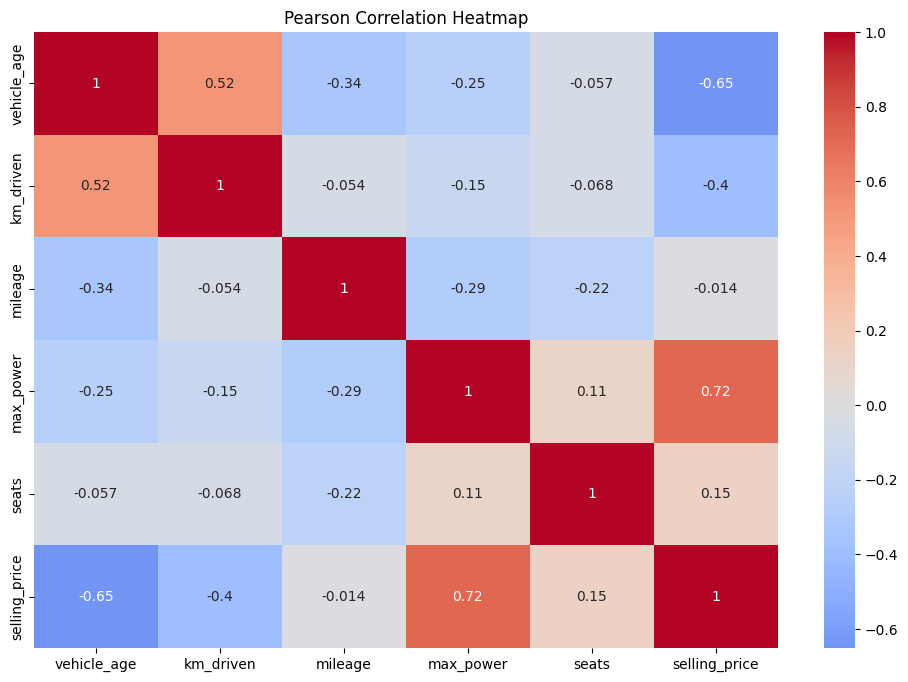

Chi-Square Test Results:
         Feature     Chi-Score        P-value
6  selling_price  1.443102e+08   0.000000e+00
4      km_driven  1.233695e+07   0.000000e+00
3    vehicle_age  3.207209e+03   0.000000e+00
2          model  1.876362e+03  2.069054e-227
0       car_name  5.796226e+02   1.362913e-20
1          brand  8.158479e+01   1.000000e+00
5          seats  6.914738e+00   1.000000e+00

SelectKBest (f_regression) Results:
       Feature      F-Score        P-value
3    max_power  2265.160928   0.000000e+00
0  vehicle_age  1562.625943  1.981832e-256
1    km_driven   400.397211   1.012246e-81
4        seats    46.634096   1.113973e-11
2      mileage     0.439881   5.072522e-01


In [59]:
#Feature Slection
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_regression

#1. Pearson Correlation
# Calculate correlation matrix
df_num.corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_num.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Pearson Correlation Heatmap')
plt.show()

#2. Chi Square Method
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder

# Prepare data (encode categorical variables)
df_encoded = df.copy()
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df[col])

# Separate features and target
X_cat = df_encoded.select_dtypes(include=['int64'])  # Encoded categoricals
y = df_encoded['selling_price']  # Target (must be encoded if categorical)

# Chi-square test
chi_scores, p_values = chi2(X_cat, y)

# Create results DataFrame
chi_results = pd.DataFrame({
    'Feature': X_cat.columns,
    'Chi-Score': chi_scores,
    'P-value': p_values
}).sort_values('Chi-Score', ascending=False)

print("Chi-Square Test Results:")
print(chi_results)

#3. Select K-Best
from sklearn.feature_selection import SelectKBest, f_regression

# For numerical features only
X_num = df.select_dtypes(include=['int64', 'float64']).drop('selling_price', axis=1)
y = df['selling_price']

# Initialize SelectKBest with f_regression (ANOVA F-value)
selector = SelectKBest(score_func=f_regression, k=5)
selector.fit(X_num, y)

# Get scores and p-values
f_scores = pd.DataFrame({
    'Feature': X_num.columns,
    'F-Score': selector.scores_,
    'P-value': selector.pvalues_
}).sort_values('F-Score', ascending=False)

print("\nSelectKBest (f_regression) Results:")
print(f_scores)

✔ Dataset loaded successfully
Shape: (2119, 9)
Columns: ['car_name', 'brand', 'model', 'vehicle_age', 'km_driven', 'mileage', 'max_power', 'seats', 'selling_price']


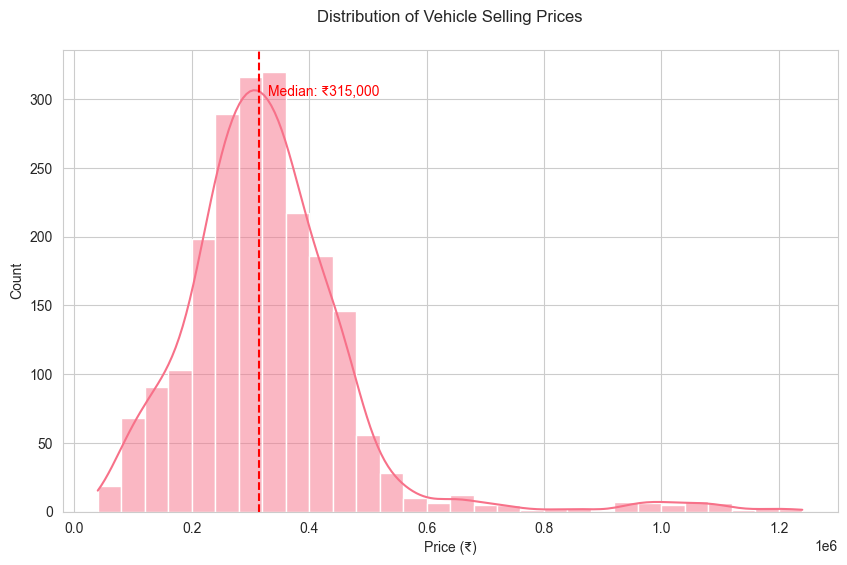


Generating pairwise relationships...


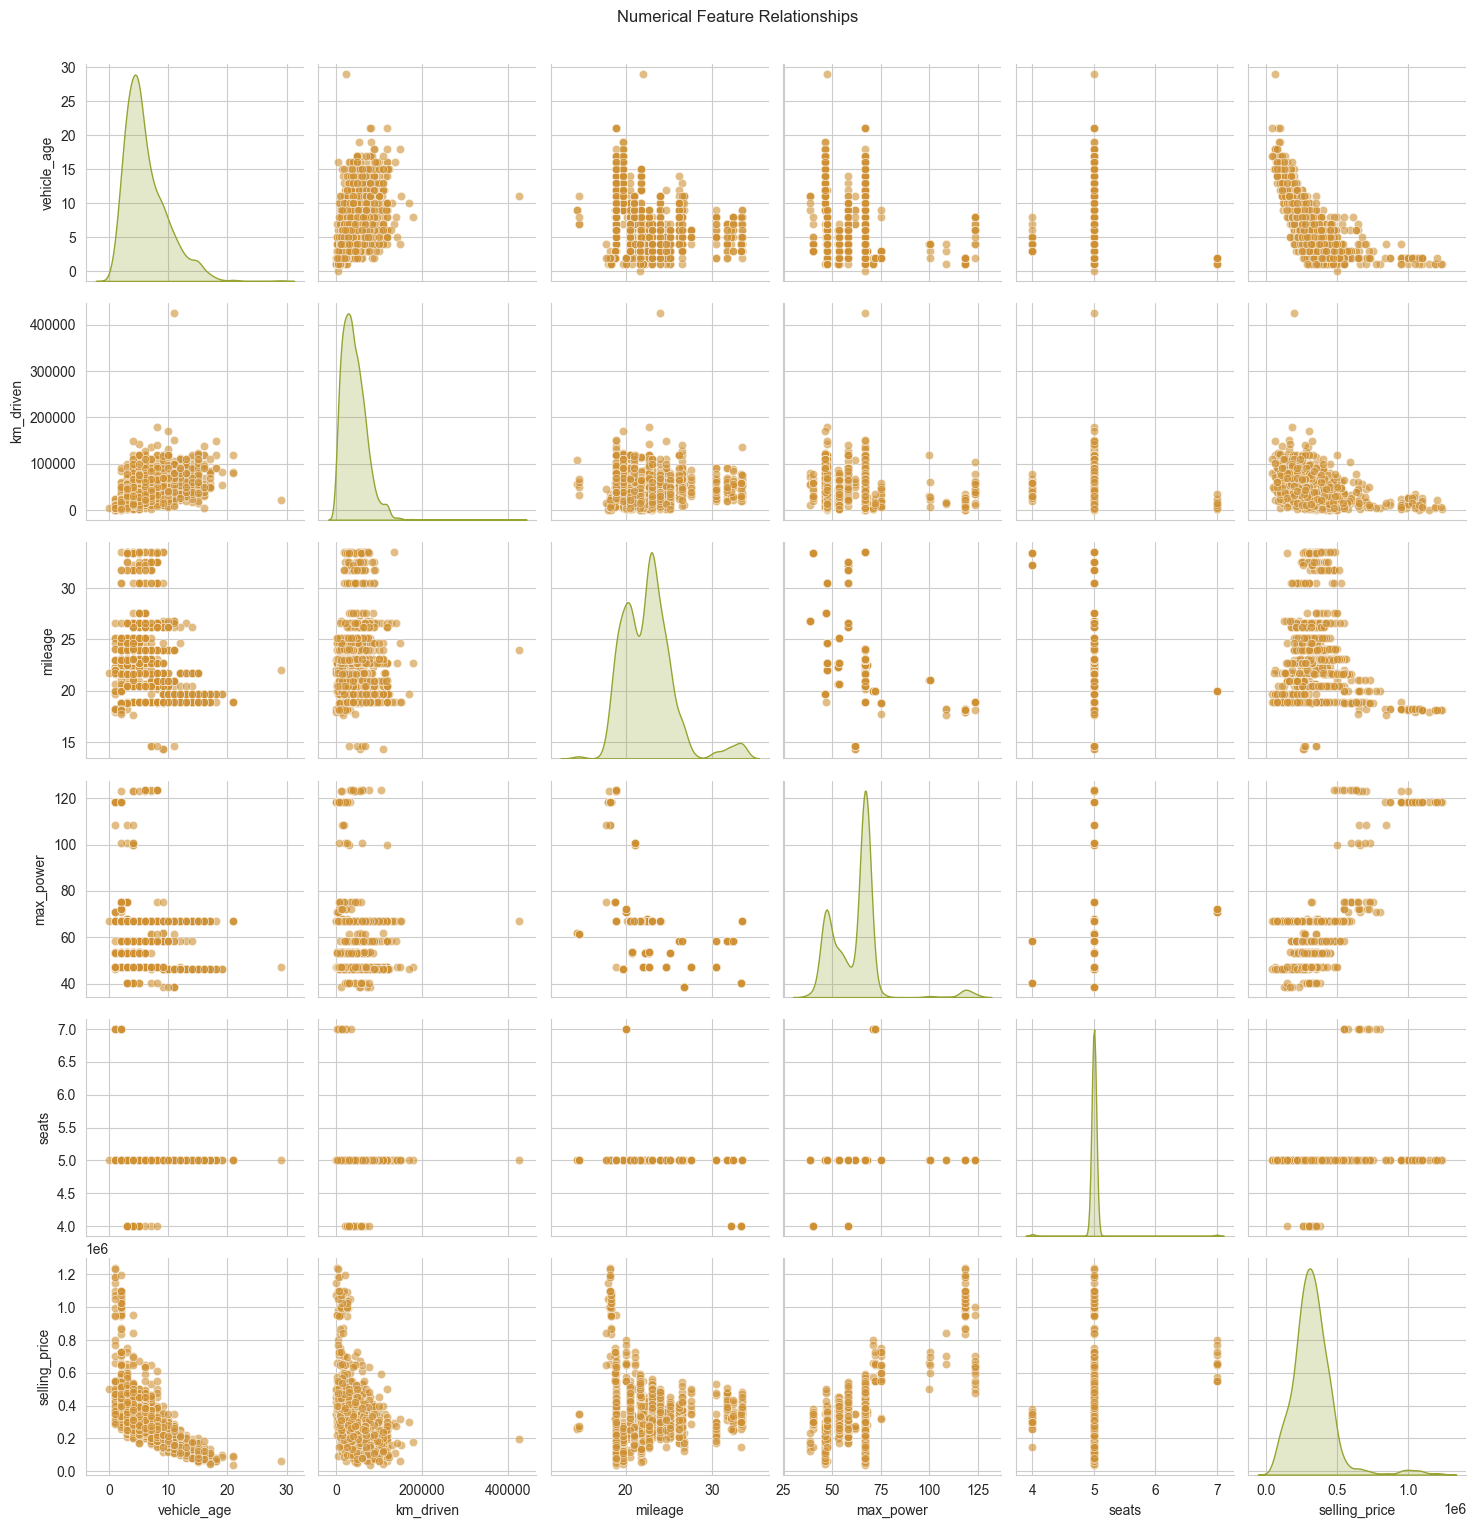


Generating feature vs price plots...


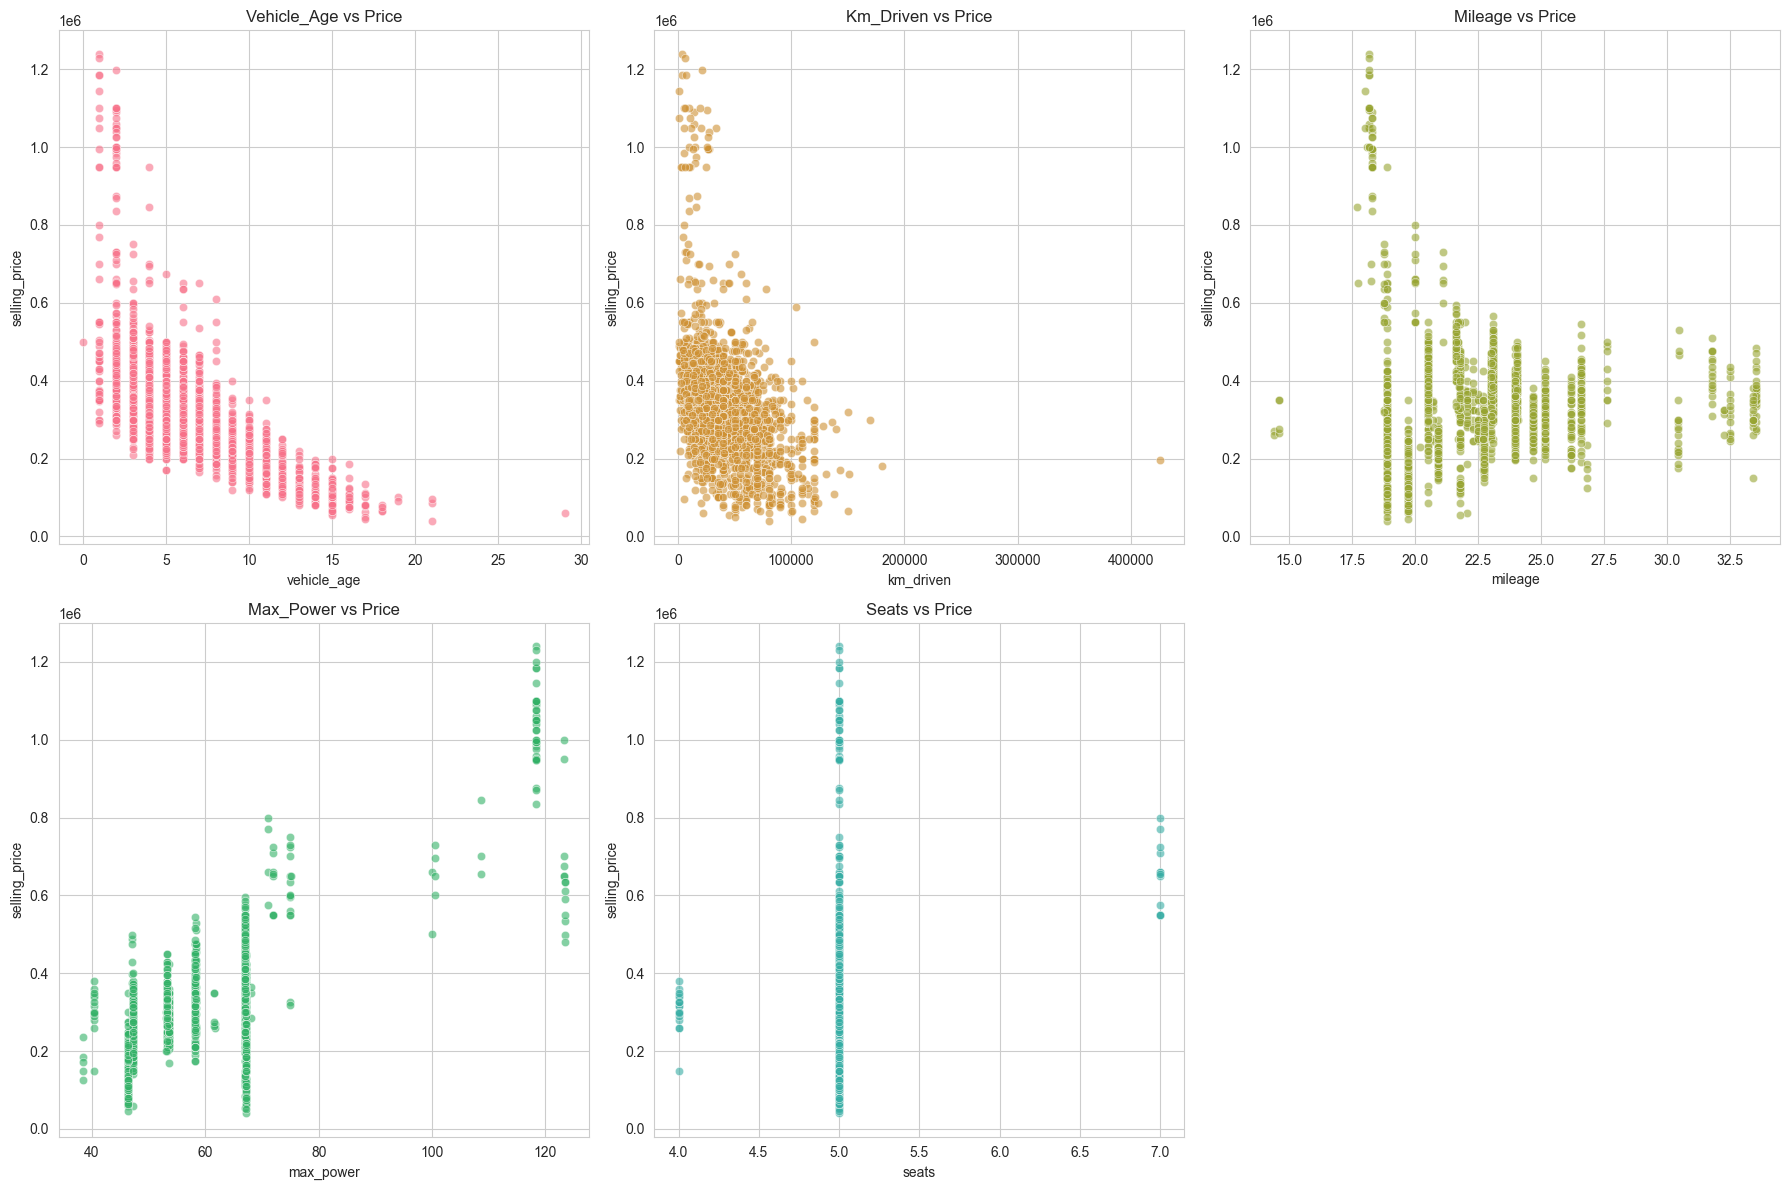


Generating correlation matrix...


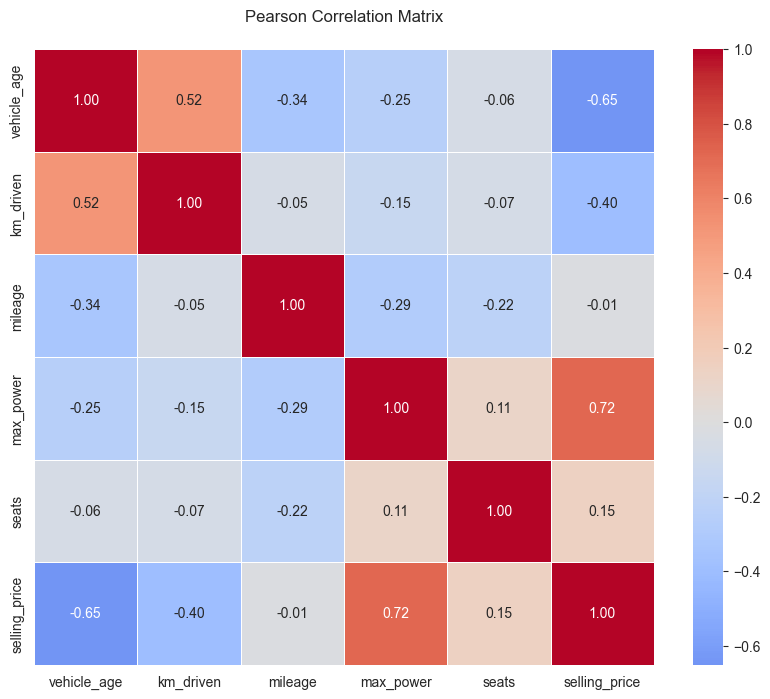


Analyzing brand price distributions...


C:\Users\user\AppData\Local\Temp\ipykernel_2540\67764669.py:133: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,
C:\Users\user\AppData\Local\Temp\ipykernel_2540\67764669.py:133: UserWarning: The palette list has more values (8) than needed (6), which may not be intended.
  sns.boxplot(data=df,


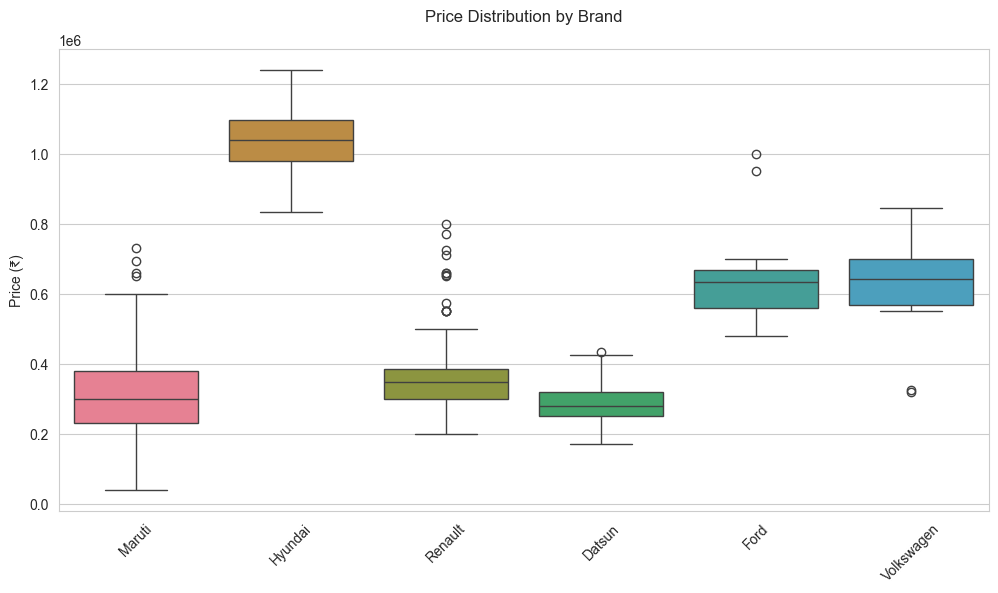


Identifying top models...


C:\Users\user\AppData\Local\Temp\ipykernel_2540\67764669.py:151: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_models.values,


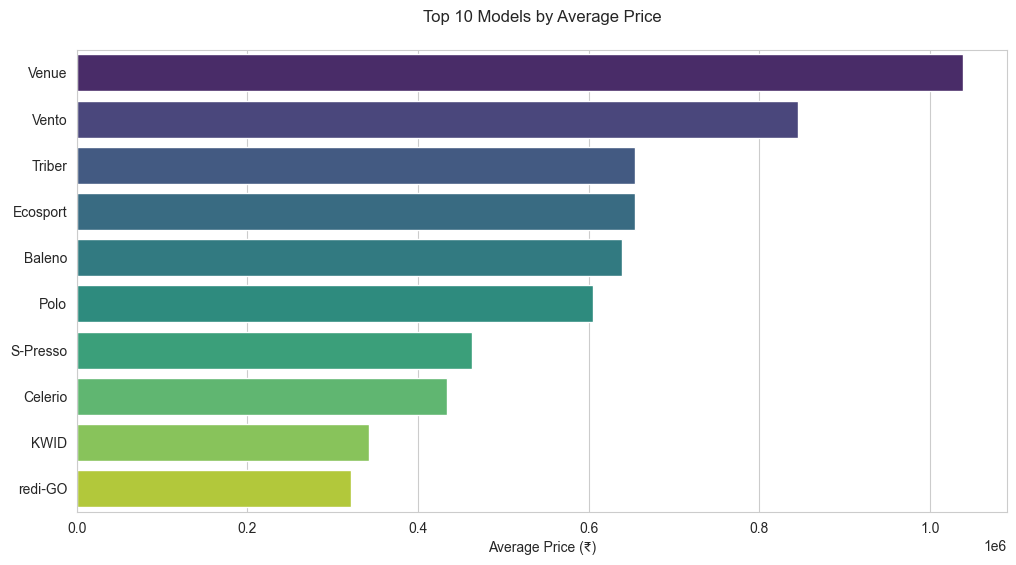


Analyzing depreciation patterns...


C:\Users\user\AppData\Local\Temp\ipykernel_2540\67764669.py:162: UserWarning: The palette list has more values (8) than needed (6), which may not be intended.
  sns.lineplot(data=df,


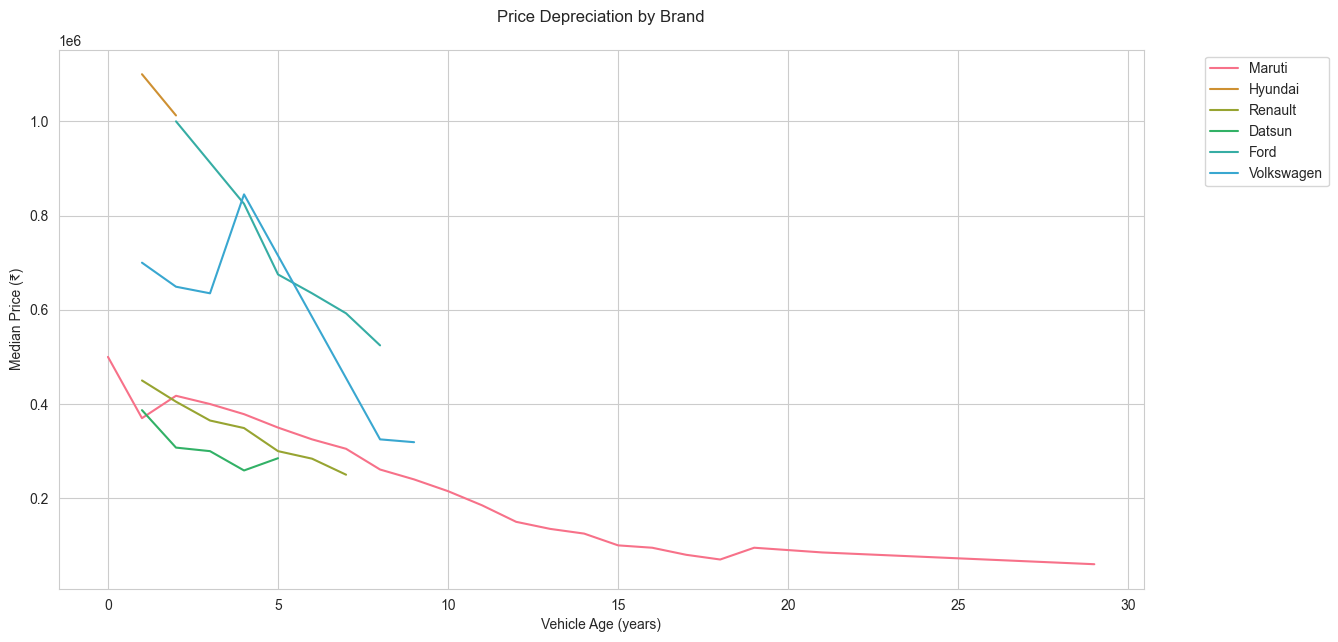


Generating 3D visualization...


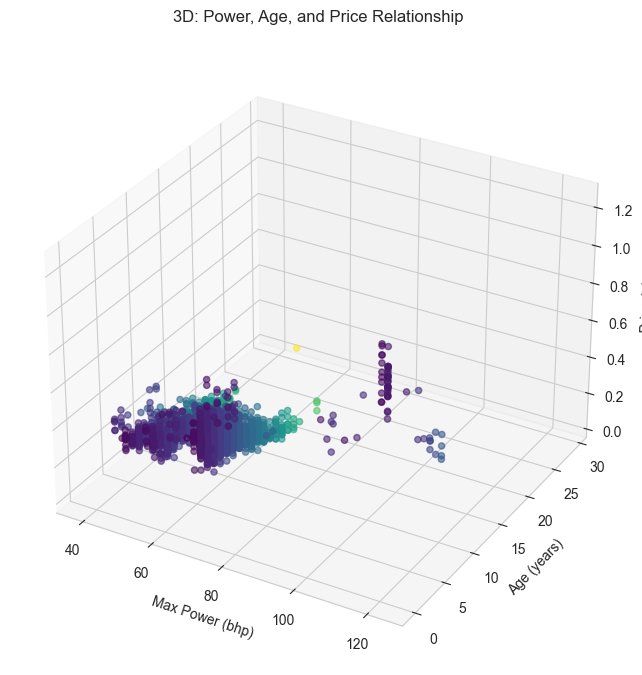


Creating faceted brand analysis...


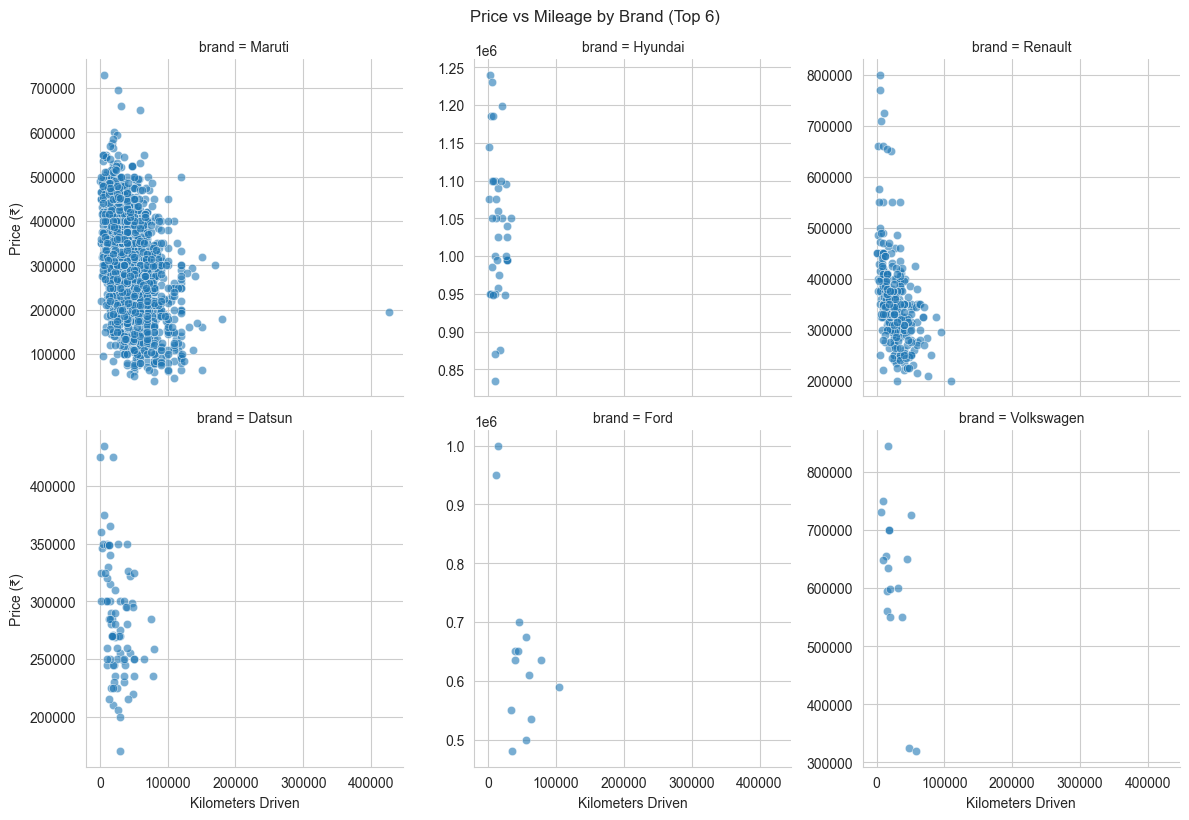


Analyzing seat configurations...


C:\Users\user\AppData\Local\Temp\ipykernel_2540\67764669.py:221: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df,
C:\Users\user\AppData\Local\Temp\ipykernel_2540\67764669.py:221: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.violinplot(data=df,


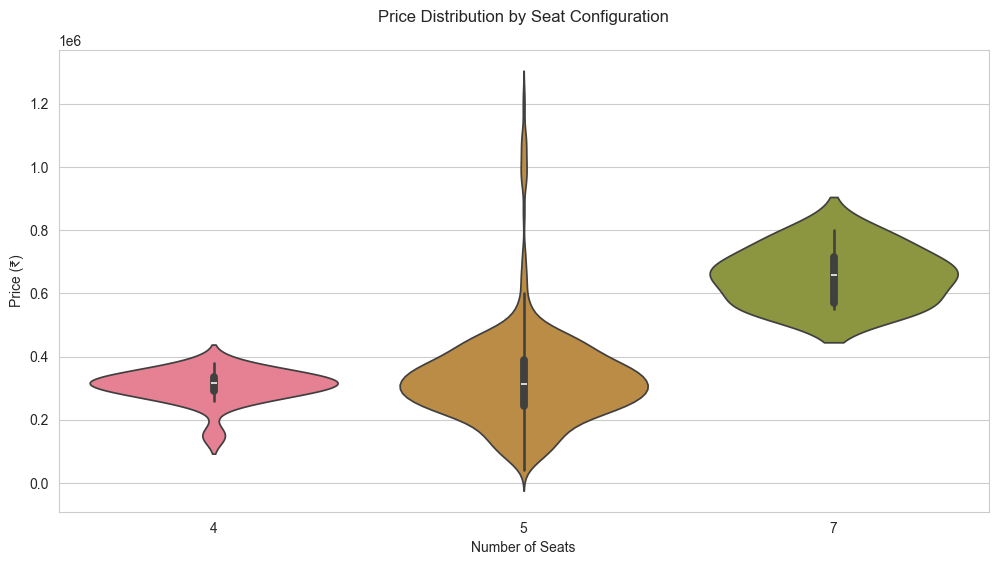

'\nEXECUTION INSTRUCTIONS\n----------------------\n1. Ensure car_data_v2.csv is in working directory\n2. Run all cells sequentially\n3. View generated plots in order:\n   - Target distribution\n   - Numerical relationships\n   - Categorical analysis\n   - Advanced visualizations\n'

In [60]:
#Visualizing data
"""
CAR SALES DATA VISUALIZATION REFERENCE
--------------------------------------
Purpose: Comprehensive visualization of vehicle sales data with clear annotations
Dataset: car_data_v2.csv
Variables:
  - Numerical: vehicle_age, km_driven, mileage, max_power, seats, selling_price
  - Categorical: brand, model
"""

# ======================
# 1. INITIAL SETUP
# ======================
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # For 3D plots

# Global style settings
sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 100
COLOR_PALETTE = sns.color_palette("husl", 8)

# Load data with validation
try:
    df = pd.read_csv('car_data_v2.csv')
    print("✔ Dataset loaded successfully")
    print(f"Shape: {df.shape}\nColumns: {list(df.columns)}")
except FileNotFoundError:
    print("× Error: File not found. Please verify path.")

# ======================
# 2. TARGET VARIABLE ANALYSIS
# ======================
def plot_target_distribution():
    """
    Visualizes the distribution of selling prices with:
    - Histogram (frequency distribution)
    - KDE (density estimation)
    - Statistical annotations
    """
    plt.figure(figsize=(10, 6))
    
    # Create plot
    ax = sns.histplot(df['selling_price'], 
                     bins=30, 
                     kde=True,
                     color=COLOR_PALETTE[0])
    
    # Annotations
    median_price = df['selling_price'].median()
    ax.axvline(median_price, color='red', linestyle='--')
    ax.text(median_price*1.05, ax.get_ylim()[1]*0.9, 
            f'Median: ₹{median_price:,.0f}', 
            color='red')
    
    plt.title('Distribution of Vehicle Selling Prices', pad=20)
    plt.xlabel('Price (₹)')
    plt.ylabel('Count')
    plt.show()

plot_target_distribution()

# ======================
# 3. NUMERICAL FEATURES
# ======================
def numerical_analysis():
    """
    Comprehensive visualization of numerical features:
    A. Pairplot - All pairwise relationships
    B. Scatterplots - Individual relationships with price
    C. Correlation - Heatmap of linear relationships
    """
    
    # A. Pairplot
    num_vars = ['vehicle_age', 'km_driven', 'mileage', 'max_power', 'seats']
    print("\nGenerating pairwise relationships...")
    sns.pairplot(df[num_vars + ['selling_price']],
                diag_kind='kde',
                plot_kws={'alpha': 0.6, 'color': COLOR_PALETTE[1]},
                diag_kws={'color': COLOR_PALETTE[2]})
    plt.suptitle('Numerical Feature Relationships', y=1.02)
    plt.show()
    
    # B. Scatterplots
    print("\nGenerating feature vs price plots...")
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    
    for i, col in enumerate(num_vars):
        row, col_pos = divmod(i, 3)
        sns.scatterplot(data=df, 
                       x=col, 
                       y='selling_price',
                       ax=axes[row, col_pos],
                       color=COLOR_PALETTE[i],
                       alpha=0.6)
        axes[row, col_pos].set_title(f'{col.title()} vs Price')
    
    fig.delaxes(axes[1, 2])  # Remove empty subplot
    plt.tight_layout()
    plt.show()
    
    # C. Correlation
    print("\nGenerating correlation matrix...")
    plt.figure(figsize=(10, 8))
    corr_matrix = df[num_vars + ['selling_price']].corr()
    sns.heatmap(corr_matrix,
               annot=True,
               cmap='coolwarm',
               center=0,
               fmt='.2f',
               linewidths=0.5)
    plt.title('Pearson Correlation Matrix', pad=20)
    plt.show()

numerical_analysis()

# ======================
# 4. CATEGORICAL ANALYSIS
# ======================
def categorical_analysis():
    """
    Visualizes categorical relationships:
    A. Brand price distributions
    B. Top models by price
    C. Age-price relationship by brand
    """
    
    # A. Brand analysis
    print("\nAnalyzing brand price distributions...")
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df,
               x='brand',
               y='selling_price',
               palette=COLOR_PALETTE)
    plt.title('Price Distribution by Brand', pad=20)
    plt.xticks(rotation=45)
    plt.ylabel('Price (₹)')
    plt.xlabel('')
    plt.show()
    
    # B. Top models
    print("\nIdentifying top models...")
    top_models = (df.groupby('model')['selling_price']
                 .mean()
                 .sort_values(ascending=False)
                 .head(10))
    
    plt.figure(figsize=(12, 6))
    sns.barplot(x=top_models.values,
               y=top_models.index,
               palette='viridis')
    plt.title('Top 10 Models by Average Price', pad=20)
    plt.xlabel('Average Price (₹)')
    plt.ylabel('')
    plt.show()
    
    # C. Age-price relationship
    print("\nAnalyzing depreciation patterns...")
    plt.figure(figsize=(14, 7))
    sns.lineplot(data=df,
                x='vehicle_age',
                y='selling_price',
                hue='brand',
                estimator='median',
                errorbar=None,
                palette=COLOR_PALETTE)
    plt.title('Price Depreciation by Brand', pad=20)
    plt.ylabel('Median Price (₹)')
    plt.xlabel('Vehicle Age (years)')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

categorical_analysis()

# ======================
# 5. ADVANCED VISUALIZATIONS
# ======================
def advanced_visualizations():
    """
    Specialized visualizations:
    A. 3D power-age-price relationship
    B. Faceted brand analysis
    C. Violin plots for seat configurations
    """
    
    # A. 3D plot
    print("\nGenerating 3D visualization...")
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    ax.scatter(df['max_power'],
              df['vehicle_age'],
              df['selling_price'],
              c=df['vehicle_age'],
              cmap='viridis',
              alpha=0.6)
    
    ax.set_xlabel('Max Power (bhp)')
    ax.set_ylabel('Age (years)')
    ax.set_zlabel('Price (₹)')
    plt.title('3D: Power, Age, and Price Relationship', pad=20)
    plt.show()
    
    # B. Facet grid
    print("\nCreating faceted brand analysis...")
    g = sns.FacetGrid(df[df['brand'].isin(df['brand'].value_counts().index[:6])],
                     col='brand',
                     col_wrap=3,
                     height=4,
                     sharey=False)
    g.map(sns.scatterplot, 'km_driven', 'selling_price', alpha=0.6)
    g.set_axis_labels('Kilometers Driven', 'Price (₹)')
    g.fig.suptitle('Price vs Mileage by Brand (Top 6)', y=1.02)
    plt.show()
    
    # C. Violin plots
    print("\nAnalyzing seat configurations...")
    plt.figure(figsize=(12, 6))
    sns.violinplot(data=df,
                  x='seats',
                  y='selling_price',
                  palette=COLOR_PALETTE)
    plt.title('Price Distribution by Seat Configuration', pad=20)
    plt.ylabel('Price (₹)')
    plt.xlabel('Number of Seats')
    plt.show()

advanced_visualizations()

"""
EXECUTION INSTRUCTIONS
----------------------
1. Ensure car_data_v2.csv is in working directory
2. Run all cells sequentially
3. View generated plots in order:
   - Target distribution
   - Numerical relationships
   - Categorical analysis
   - Advanced visualizations
"""